In [254]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

In [255]:
# Reading whole dataset from file and loading the data into a DataFrame
file_path = 'age_data.xls'
try:
    df_sheet_names = pd.ExcelFile(file_path).sheet_names
except FileNotFoundError:
    print(f"No file found at {file_path}")
    # Handle the error or exit
    exit()

# Function to filter a dataset for Nigeria
def filtered_dataset(dataset):
    # Check if the country code exists in the dataset
    if 927 not in dataset['Country code'].values:
        print("Country code 927 not found in dataset")
        # Handle the error or return
        return dataset
    return dataset[dataset['Country code'] == 927]\
            .drop(columns = ['Country code'])\
            .set_index('Year')

# Try to read raw data from excel and assign to variables
try:
    both_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[0])
    both_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[1])
    male_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[3])
    male_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[4])
    female_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[6])
    female_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[7])
except KeyError as e:
    print(f"Sheet name {e} not found in Excel file")
    # Handle the error or exit
    exit()

# Update datasets to filter data for Nigeria
both_1950_2005_estimates = filtered_dataset(both_1950_2005_estimates)
both_2010_2050_medium_fertility = filtered_dataset(both_2010_2050_medium_fertility)
male_1950_2005_estimates = filtered_dataset(male_1950_2005_estimates)
male_2010_2050_medium_fertility = filtered_dataset(male_2010_2050_medium_fertility)
female_1950_2005_estimates = filtered_dataset(female_1950_2005_estimates)
female_2010_2050_medium_fertility = filtered_dataset(female_2010_2050_medium_fertility)

In [256]:
both_2010_2050_medium_fertility


,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
2010,1546.980,1549.665,1613.325,1723.457,1791.215,1778.882,1700.642,1772.833,1831.398,1836.259,...,1590.048,1425.814,1062.872,809.331,626.636,496.230,301.671,119.975,32.708,5.097
2015,1610.175,1569.680,1563.453,1648.353,1800.051,1883.905,1856.407,1754.726,1805.478,1846.186,...,1739.184,1551.773,1362.429,981.503,705.669,496.480,333.745,155.862,44.002,7.815
2020,1701.028,1632.965,1583.562,1598.766,1725.631,1893.399,1961.862,1910.710,1788.219,1821.455,...,1817.297,1699.511,1486.490,1262.508,860.654,564.401,339.733,177.364,59.307,11.043
2025,1731.351,1723.863,1646.896,1619.024,1676.465,1819.575,1971.841,2016.432,1944.233,1805.053,...,1830.160,1777.981,1631.159,1382.221,1112.843,694.186,391.934,185.204,69.633,15.394
2030,1720.128,1754.246,1737.817,1682.439,1696.956,1770.833,1898.578,2026.864,2050.176,1960.951,...,1808.684,1792.964,1709.710,1521.409,1225.037,905.521,489.288,219.083,75.186,19.133
2035,1696.500,1743.099,1768.241,1773.424,1760.542,1791.599,1850.282,1954.203,2061.128,2067.085,...,1794.882,1774.141,1727.430,1599.153,1354.800,1005.365,647.610,279.994,91.641,21.796
2040,1700.796,1719.552,1757.143,1803.937,1851.670,1855.392,1871.344,1906.396,1989.194,2078.678,...,1949.766,1762.440,1712.334,1620.296,1430.256,1120.349,729.141,379.181,120.526,26.859
2045,1738.965,1723.912,1733.648,1792.942,1882.382,1946.706,1935.372,1927.792,1941.992,2007.715,...,2056.156,1915.838,1703.635,1610.363,1455.624,1191.243,823.019,436.458,167.911,35.748
2050,1789.802,1762.128,1738.046,1769.534,1871.578,1977.641,2026.860,1992.050,1963.767,1961.297,...,2069.874,2022.030,1854.349,1605.797,1452.688,1221.236,885.795,502.896,198.767,50.623


In [257]:
both_1950_2005_estimates

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
1950,1117.000,884.000,733.000,691.000,785.000,824.000,750.000,762.000,682.000,600.000,...,491.000,435.000,342.000,234.000,148.000,114.997,-,-,-,-
1955,1237.808,1172.995,921.852,762.390,731.474,858.000,879.907,786.250,787.246,688.606,...,507.224,452.407,385.657,271.089,173.423,132.551,-,-,-,-
1960,1380.908,1275.172,1217.325,954.109,822.486,800.546,905.199,909.169,803.524,790.558,...,563.274,473.543,400.757,320.018,198.417,155.548,-,-,-,-
1965,1487.193,1443.794,1342.967,1274.362,1018.971,895.770,848.394,939.316,941.389,807.970,...,652.392,527.156,432.246,330.276,236.341,192.858,-,-,-,-
1970,1505.231,1558.180,1502.895,1389.109,1326.623,1083.302,952.340,884.998,956.904,938.726,...,749.267,609.224,469.411,360.812,248.314,223.170,-,-,-,-
1975,1556.879,1543.425,1582.910,1522.975,1402.680,1371.577,1121.236,972.005,900.812,943.755,...,750.849,683.976,540.537,397.536,262.235,250.057,-,-,-,-
1980,1380.649,1550.549,1602.641,1585.616,1538.529,1441.883,1394.666,1146.714,981.034,892.583,...,863.525,731.595,631.204,473.437,308.871,300.193,-,-,-,-
1985,1474.813,1421.480,1591.883,1640.291,1615.777,1580.782,1490.374,1419.158,1161.738,981.275,...,904.370,822.846,671.923,547.978,376.487,331.634,-,-,-,-
1990,1515.220,1498.707,1478.682,1680.150,1622.807,1676.858,1656.937,1545.983,1489.248,1159.943,...,856.222,869.023,784.544,580.497,451.261,444.904,-,-,-,-


In [258]:
def get_survival_rate(dataset, start_year, end_year):
    start_pop = dataset.loc[start_year]
    end_pop = dataset.loc[end_year]

    # Replace non-numeric values with NaN
    start_pop = pd.to_numeric(start_pop, errors='coerce')
    end_pop = pd.to_numeric(end_pop, errors='coerce')

    # Shift the start population down by one
    start_pop_shifted = start_pop.shift(periods = 1)

    # Calculate the survival rate, handling possible division by zero
    survival_rate = np.where(start_pop_shifted != 0, end_pop / start_pop_shifted, np.nan)

    # Convert numpy array to pandas Series
    survival_rate_series = pd.Series(survival_rate, index=start_pop.index)

    survival_rate_df = survival_rate_series.to_frame(end_year)

    # Drop '0 - 4' row if it exists
    if '0 - 4' in survival_rate_df.index:
        survival_rate_df = survival_rate_df.drop('0 - 4')

    return survival_rate_df.T


In [259]:
def min_max_survival_rate_by_age_group(dataset, start_year, end_year, step=5):
    # Initialize the min and max survival rates as empty dictionaries
    min_survival_rates = {}
    max_survival_rates = {}

    for year in range(start_year, end_year, step):
        survival_rate_df = get_survival_rate(dataset, year, year + step)
        survival_rate_df = survival_rate_df.reset_index(drop=True)  # Reset the index

        for col in survival_rate_df.columns:
            # Update the min and max survival rates for each age group
            min_survival_rates[col] = min(min_survival_rates.get(col, float('inf')), survival_rate_df[col].min())
            max_survival_rates[col] = max(max_survival_rates.get(col, float('-inf')), survival_rate_df[col].max())

    # Convert the dictionaries back to pandas Series for easier viewing and manipulation
    min_survival_rates = pd.Series(min_survival_rates)
    max_survival_rates = pd.Series(max_survival_rates)

    return min_survival_rates, max_survival_rates

# Call the function
min_survival_rate, max_survival_rate = min_max_survival_rate_by_age_group(male_1950_2005_estimates, 1950, 2005)

# Print results
print("Min survival rates for each age group: \n", min_survival_rate)
print("\nMax survival rates for each age group: \n", max_survival_rate)


Min survival rates for each age group: 
 5 - 9      0.995665
10 - 14    1.010998
15 - 19    1.000360
20 - 24    0.955330
25 - 29    0.978536
30 - 34    1.007877
35 - 39    1.013228
40 - 44    1.011412
45 - 49    0.978391
50 - 54    0.957093
55 - 59    0.938359
60 - 64    0.887035
65 - 69    0.838299
70 - 74    0.747494
75 - 79    0.658797
80 - 84    0.617803
85 - 89    0.317145
90 - 94    0.380615
95 - 99    0.263717
100+       0.199839
dtype: float64

Max survival rates for each age group: 
 5 - 9      1.062064
10 - 14    1.055311
15 - 19    1.055889
20 - 24    1.084572
25 - 29    1.114911
30 - 34    1.079730
35 - 39    1.052005
40 - 44    1.059169
45 - 49    1.013456
50 - 54    1.000313
55 - 59    0.984983
60 - 64    0.966617
65 - 69    0.937440
70 - 74    0.891362
75 - 79    0.826119
80 - 84    0.977902
85 - 89    0.578153
90 - 94    0.412859
95 - 99    0.286443
100+       0.206897
dtype: float64


In [260]:
def get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups):
    """
    Calculate the fertility rate for a given year.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - year: The year to calculate the fertility rate for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    
    Returns:
    The fertility rate for the given year, defined as the ratio of the number of children
    to the number of women in the given age groups.
    """
    
    children_population = dataset_children.loc[year, child_age_group]
    women_population = dataset_women.loc[year, women_age_groups].sum()
    
    return children_population / women_population


In [261]:
def get_fertility_rates(dataset_children, dataset_women, start_year, end_year, child_age_group, women_age_groups):
    fertility_rates = {}

    for year in range(start_year, end_year, 5):
        children_population = dataset_children.loc[year, child_age_group]
        women_population = dataset_women.loc[year, women_age_groups].sum()

        fertility_rate = children_population / women_population if women_population != 0 else np.nan
        fertility_rates[year] = fertility_rate

    return pd.Series(fertility_rates, name='fertility_rate')

In [262]:
fertility_rates = get_fertility_rates(both_1950_2005_estimates, female_1950_2005_estimates, 1950, 2010, '0 - 4', ['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49'])
fertility_rates

1950    0.448594
1955    0.464512
1960    0.474853
1965    0.453801
1970    0.411390
1975    0.387202
1980    0.312804
1985    0.302430
1990    0.283223
1995    0.277150
2000    0.267396
2005    0.250215
Name: fertility_rate, dtype: float64

In [263]:
min(fertility_rates)

0.25021521729655616

In [264]:
max(fertility_rates)

0.47485262597929834

In [265]:
category = both_1950_2005_estimates.columns

def get_boy_prob(year):
    return male_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

def get_girl_prob(year):
    return female_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

In [266]:
get_boy_prob(1995)

0.513391388051811

In [267]:
def predictionModel(fertility, boy_probability, survival_rate, forecast_years):
    """
    This function generates population projections based on the given parameters.

    Parameters:
    survival_rate (float): The survival rate used for simulation.
    fertility (float): The fertility rate used for simulation.
    boy_probability (float): The probability of a newborn being a boy.
    forecast_years (list): The years for which to generate forecasts.

    Returns:
    population_projections (pd.DataFrame): A DataFrame containing the population projections for each age group and each year.
    """

    # Year to start the simulation
    start_year = 2005

    # Year to end the simulation
    end_year = max(forecast_years)

    # Age groups to consider in the simulation
    age_groups = ['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', 
                '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94', '95 - 99', '100+']
    
    # Age groups that can contribute to fertility
    fertility_age_groups = ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']
    
    girl_probability = 1 - boy_probability

    # The initial population estimates for females
    female_estimates = female_1950_2005_estimates.copy()

    # The initial population estimates for males
    male_estimates = male_1950_2005_estimates.copy()

    # The initial population estimates for both genders
    both_estimates = both_1950_2005_estimates.copy()
    
    # Create a list of years for which the simulation will run
    years = list(range(start_year, end_year+1, 5))

    # Initialize the DataFrame for storing the population projections
    population_projections = pd.DataFrame(index=range(start_year, end_year+1, 5), columns=age_groups)
    
    # Populate the projections for the start year with initial population estimates
    population_projections.loc[start_year] = both_estimates.loc[start_year]
    
    # For each year in the simulation...
    for i in range(len(years) -1):
        # Only compute forecasts for the specified years
        if years[i+1] in forecast_years:
            # Compute the female newborns based on fertility rate, relevant age group population, and girl probability
            f_0 = female_estimates.loc[years[i+1],age_groups[0]] = fertility * female_estimates.loc[years[i], fertility_age_groups].sum() * girl_probability
            # Compute the remaining female population based on survival rate and previous year's population
            f_1 = female_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * female_estimates.loc[years[i]].shift(periods = 1)
            # Compute the male newborns based on fertility rate, relevant age group population, and boy probability
            m_0 = male_estimates.loc[years[i+1],age_groups[0]] = fertility * male_estimates.loc[years[i], fertility_age_groups].sum() * boy_probability
            # Compute the remaining male population based on survival rate and previous year's population
            m_1 = male_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * male_estimates.loc[years[i]].shift(periods = 1)
            
            # Update the population projections with the computed values for newborns and remaining population
            population_projections.loc[years[i+1],age_groups[0]] = f_0 + m_0
            population_projections.loc[years[i+1],age_groups[1:]] = f_1 + m_1

    # Filter the final DataFrame to only include the forecast years
    population_projections = population_projections.loc[forecast_years]
    
    # Return the final population projections
    return population_projections


In [268]:
# Model's implementation

# The survival rate used for simulation. Here, it is fetched from another function `get_survival_rate`
survival_rate = get_survival_rate(both_1950_2005_estimates, 2000, 2005).loc[2005]

fertility_rate = get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, '0 - 4', ['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39'])

# The probability of a newborn being a boy, fetched from another function `get_boy_prob`
boys_ratio = get_boy_prob(2005)

forecast_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

# Model's Execution

# Call the `generate_population_projection` function to run the simulation 
# The function uses the parameters defined above to simulate the population projections
population_projections = predictionModel(
    fertility = fertility_rate,
    boy_probability = boys_ratio,
    survival_rate = survival_rate,
    forecast_years = forecast_years,
)

In [269]:
population_projections

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,1527.097,1599.687,1688.819,1715.322,1686.743,1623.45,1719.628,1799.881,1822.688,1759.714,...,1463.548,1114.879,880.007,723.539,633.739,457.353,240.393,93.34,22.118,3.423
2010,1526.312547,1552.274975,1617.702997,1731.080726,1803.741244,1793.70456,1704.188532,1775.993879,1834.607622,1839.185879,...,1589.898968,1425.68835,1060.731498,805.880055,621.825686,490.395597,295.062611,115.084051,30.96122,4.89335
2015,1573.860524,1551.477588,1569.757008,1658.185085,1820.31228,1918.122023,1882.910309,1760.048336,1810.259627,1851.213391,...,1739.54274,1548.77082,1356.445443,971.381317,692.59144,481.176917,316.380138,141.256195,38.173801,6.84981
2020,1615.488236,1599.809511,1568.950641,1609.039275,1743.659108,1935.743879,2013.515386,1944.628247,1794.006433,1826.645012,...,1818.103649,1694.543546,1473.550038,1242.185947,834.826946,535.936391,310.43268,151.461598,46.855197,8.445509
2025,1652.66243,1642.123559,1617.826888,1608.21273,1691.979992,1854.229894,2032.013625,2079.51429,1982.147599,1810.244704,...,1829.993291,1771.07221,1612.242867,1349.426296,1067.562534,646.000102,345.760913,148.614354,50.240366,10.366167
2030,1656.17315,1679.910661,1660.617485,1658.312077,1691.110841,1799.273646,1946.44573,2098.618864,2119.636114,2000.088811,...,1805.706535,1782.654286,1685.054682,1476.436405,1159.727301,826.09397,416.768834,165.527143,49.295925,11.115097
2035,1643.380971,1683.479265,1698.830153,1702.173484,1743.792645,1798.349379,1888.75636,2010.246228,2139.109288,2138.821789,...,1789.494221,1758.995789,1696.07424,1543.114953,1268.882644,897.412282,532.956914,199.520975,54.905959,10.90615
2040,1634.501389,1670.476174,1702.438947,1741.342402,1789.914965,1854.371899,1887.786127,1950.66592,2049.031604,2158.471223,...,1977.162182,1743.202862,1673.56479,1553.206284,1326.187688,981.878126,578.96813,255.144037,66.181837,12.147305
2045,1649.146541,1661.450191,1689.289413,1745.041504,1831.102913,1903.418976,1946.594797,1949.663884,1988.301763,2067.57821,...,2114.304891,1926.016153,1658.538894,1532.592906,1334.860405,1026.221525,633.461513,277.171122,84.632211,14.641962
2050,1676.493822,1676.336805,1680.161777,1731.562911,1834.992692,1947.218779,1998.081118,2010.400182,1987.280394,2006.298679,...,2133.729086,2059.611198,1832.473299,1518.832709,1317.144804,1032.932587,662.069786,303.258901,91.938675,18.723892


In [270]:
def plot_comparison(year):
    plt.figure(figsize = (20,7))
    plt.plot(population_projections.loc[year], label = 'Predict by me')
    plt.plot(both_2010_2050_medium_fertility.loc[year], label = 'Predict by UN')
    plt.legend()
    plt.title('Comparison my and UN forecast')
    plt.show();

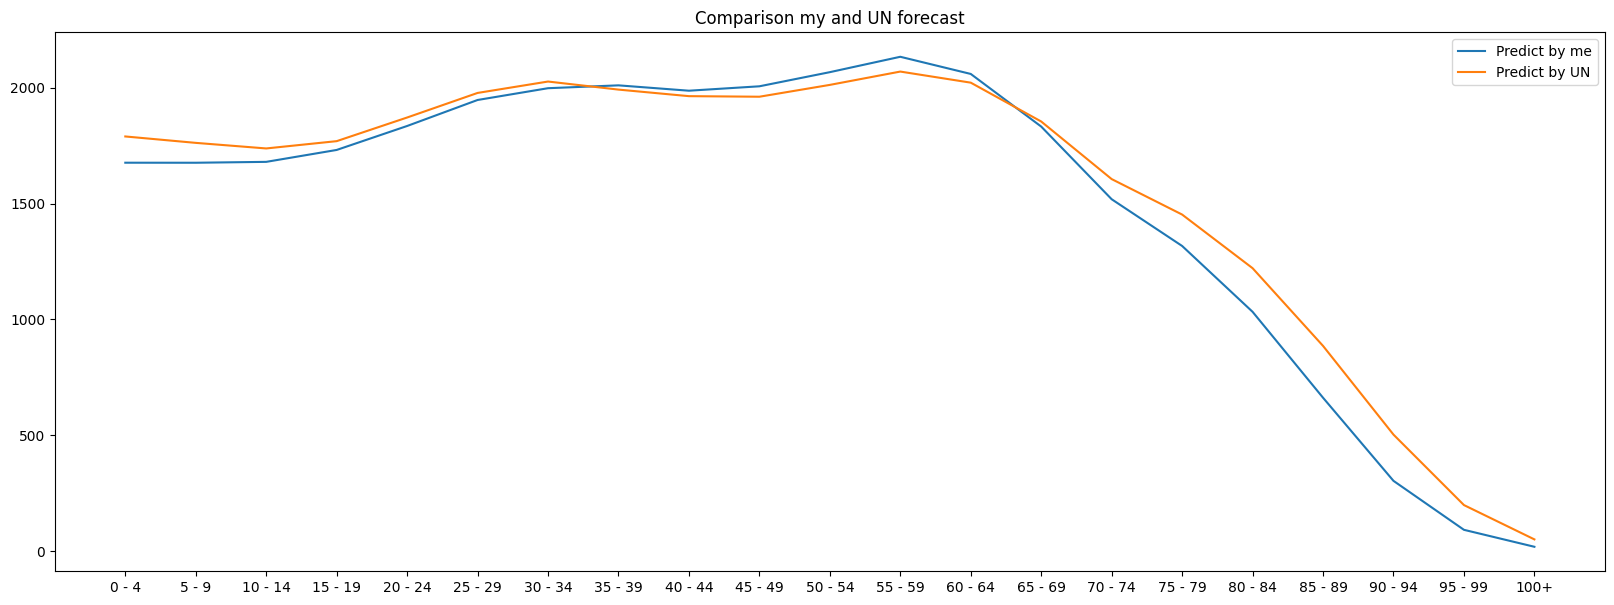

In [271]:
plot_comparison(2050)


TASK 1

Perform a sensitivity analysis for a demographic model with respect to a set of parameters: fertility rate, boys/girls ratio, «survival» rate for different age groups (not all can be taken). Model output: number of inhabitants for a given year. Test on the final forecast values ​​for 10, 20, 50, 100 years.

In [272]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import random,math,statistics

Let's understand the variation in our parameters

1. FERTILITY RATE

In [273]:
min_fertility_rate = min(fertility_rates)
max_fertility_rate = max(fertility_rates)
mean_fertility_rate = statistics.mean(fertility_rates)

In [274]:
min_fertility_rate

0.25021521729655616

In [275]:
max_fertility_rate

0.47485262597929834

In [276]:
mean_fertility_rate

0.36113091804468095

2. BOYS RATIO

In [277]:
def boys_girls_ratio_variance(dataset_men, dataset_women, start_year, end_year, age_group):

    years = list(range(start_year, end_year + 1, 5))
    gender_ratios = []

    for year in years:
        boys = dataset_men.loc[year, age_group]
        girls = dataset_women.loc[year, age_group]
        ratio = boys / girls
        gender_ratios.append(ratio)

    return min(gender_ratios), max(gender_ratios), statistics.mean(gender_ratios)


min_boys, max_boys, mean_boys = boys_girls_ratio_variance(male_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, '0 - 4')


In [278]:
min_boys

1.0456637623954914

In [279]:
max_boys

1.0550396672931748

In [280]:
mean_boys

1.050203987680721

3. SURVIVAL RATE

In [281]:
def min_max_mean_survival_rate_by_age_group(dataset, start_year, end_year, step=5):
    # Initialize the min, max, and mean survival rates as empty dictionaries
    min_survival_rates = {}
    max_survival_rates = {}
    mean_survival_rates = {}

    for year in range(start_year, end_year, step):
        survival_rate_df = get_survival_rate(dataset, year, year + step)
        survival_rate_df = survival_rate_df.reset_index(drop=True)  # Reset the index

        for col in survival_rate_df.columns:
            # Update the min and max survival rates for each age group
            min_survival_rates[col] = min(min_survival_rates.get(col, float('inf')), survival_rate_df[col].min())
            max_survival_rates[col] = max(max_survival_rates.get(col, float('-inf')), survival_rate_df[col].max())

            # Update the mean survival rates for each age group
            if col in mean_survival_rates:
                mean_survival_rates[col].append(survival_rate_df[col].mean())
            else:
                mean_survival_rates[col] = [survival_rate_df[col].mean()]

    # Compute the final mean survival rate for each age group
    for col in mean_survival_rates.keys():
        mean_survival_rates[col] = statistics.mean(mean_survival_rates[col])

    # Convert the dictionaries back to pandas Series for easier viewing and manipulation
    min_survival_rates = pd.Series(min_survival_rates)
    max_survival_rates = pd.Series(max_survival_rates)
    mean_survival_rates = pd.Series(mean_survival_rates)

    return min_survival_rates, max_survival_rates, mean_survival_rates

# Call the function
min_survival_rate, max_survival_rate, mean_survival_rate = min_max_mean_survival_rate_by_age_group(male_1950_2005_estimates, 1950, 2005)

# Print results
print("Min survival rates for each age group: \n", min_survival_rate)
print("\nMax survival rates for each age group: \n", max_survival_rate)
print("\nMean survival rates for each age group: \n", mean_survival_rate)


Min survival rates for each age group: 
 5 - 9      0.995665
10 - 14    1.010998
15 - 19    1.000360
20 - 24    0.955330
25 - 29    0.978536
30 - 34    1.007877
35 - 39    1.013228
40 - 44    1.011412
45 - 49    0.978391
50 - 54    0.957093
55 - 59    0.938359
60 - 64    0.887035
65 - 69    0.838299
70 - 74    0.747494
75 - 79    0.658797
80 - 84    0.617803
85 - 89    0.317145
90 - 94    0.380615
95 - 99    0.263717
100+       0.199839
dtype: float64

Max survival rates for each age group: 
 5 - 9      1.062064
10 - 14    1.055311
15 - 19    1.055889
20 - 24    1.084572
25 - 29    1.114911
30 - 34    1.079730
35 - 39    1.052005
40 - 44    1.059169
45 - 49    1.013456
50 - 54    1.000313
55 - 59    0.984983
60 - 64    0.966617
65 - 69    0.937440
70 - 74    0.891362
75 - 79    0.826119
80 - 84    0.977902
85 - 89    0.578153
90 - 94    0.412859
95 - 99    0.286443
100+       0.206897
dtype: float64

Mean survival rates for each age group: 
 5 - 9      1.033516
10 - 14    1.037225
15 -

In [282]:
min_survival_rate['5 - 9']

0.9956648270454477

In [283]:
max_survival_rate['5 - 9']

1.0620637652017555

10 Years Sensitivity Analysis

In [284]:
problem = {
    'num_vars': 9,
    'names': ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    'bounds': [
        [min_fertility_rate, max_fertility_rate], 
        [min_boys, max_boys],
        [min_survival_rate['5 - 9'], max_survival_rate['5 - 9']],
        [min_survival_rate['10 - 14'], max_survival_rate['10 - 14']],
        [min_survival_rate['15 - 19'], max_survival_rate['15 - 19']],
        [min_survival_rate['20 - 24'], max_survival_rate['20 - 24']],
        [min_survival_rate['25 - 29'], max_survival_rate['25 - 29']],
        [min_survival_rate['30 - 34'], max_survival_rate['30 - 34']],
        [min_survival_rate['35 - 39'], max_survival_rate['35 - 39']]
    ]
}

def Evaluate(param_values):
    Y = []

    for params in param_values:
        fertility_rate = params[0]
        boys_ratio = params[1]
        survival_rate_partial = params[2:9]  # Corrected the range to include all survival rate variables
        survival_rate = np.ones(21)
        survival_rate[1:8] = survival_rate_partial  # Corrected the range to include '35 - 39' group

        res = predictionModel(
            fertility = fertility_rate,
            boy_probability = boys_ratio,
            survival_rate = survival_rate,
            forecast_years = [2005, 2010, 2015]
        )
        
        total_population_last_year = res.iloc[-1].sum()
        Y.append(total_population_last_year)
    
    return np.array(Y)

param_values = saltelli.sample(problem, 500)
Y = Evaluate(param_values)
Si = sobol.analyze(problem, Y, print_to_console=False)
print("__________________")
print(Si['S1'])

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_83866/1018058365.py:39: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
[ 8.46888289e-01 -1.30309056e-07  8.31146241e-03  5.22342625e-03
  1.15382126e-02  5.13939681e-02  5.84401721e-02  1.37785521e-02
  4.70288630e-03]


Let's visualize

In [285]:
import matplotlib.pyplot as plt

def plot_sensitivity_indices(parameters, s1_values, prediction_years):
    """
    This function creates a horizontal bar chart of the first-order sensitivity indices.

    Parameters:
    parameters (list): The names of the parameters.
    s1_values (list): The first-order sensitivity indices of the parameters.
    prediction_years (int): The number of years of prediction.
    """

    # Create a bar chart
    plt.figure(figsize=(10,8))
    bars = plt.barh(parameters, s1_values, color='skyblue')

    # Add the S1 values on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width,  # X-coordinate of the text (with a slight adjustment to place the text to the right of the bar)
                bar.get_y() + bar.get_height() / 2,  # Y-coordinate of the text (centered vertically with respect to the bar)
                f'{width:.3f}',  # Value to display (formatted as a decimal with 3 places)
                va='center',  # Vertical alignment of the text
                ha='left')  # Horizontal alignment of the text

    plt.xlabel('S1 Sensitivity Indices')
    plt.title(f'First-order Sensitivity Indices of Parameters ({prediction_years} Years Prediction)')

    # Change the background color of the plot area
    plt.gca().set_facecolor('whitesmoke')

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.gca().invert_yaxis()  # Invert the y-axis so the parameter with the highest S1 is on top

    plt.show()


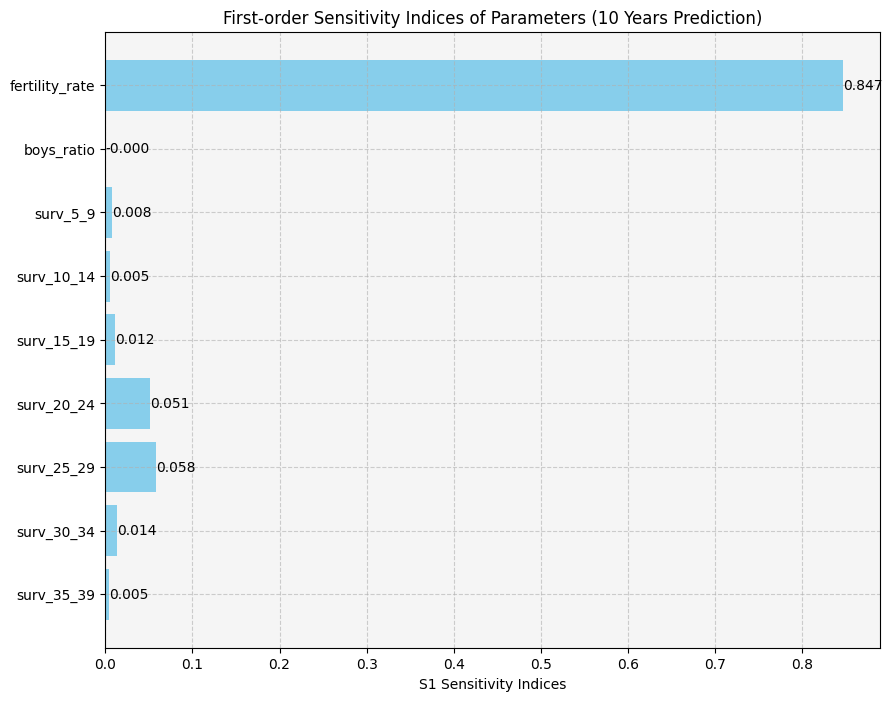

In [286]:
# Define parameter names and corresponding S1 values
parameters = ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39']
s1_values = Si['S1']

plot_sensitivity_indices(parameters, s1_values, 10)


20 Years Sensitivity Analysis

In [287]:
problem = {
    'num_vars': 9,
    'names': ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    'bounds': [
        [min_fertility_rate, max_fertility_rate], 
        [min_boys, max_boys],
        [min_survival_rate['5 - 9'], max_survival_rate['5 - 9']],
        [min_survival_rate['10 - 14'], max_survival_rate['10 - 14']],
        [min_survival_rate['15 - 19'], max_survival_rate['15 - 19']],
        [min_survival_rate['20 - 24'], max_survival_rate['20 - 24']],
        [min_survival_rate['25 - 29'], max_survival_rate['25 - 29']],
        [min_survival_rate['30 - 34'], max_survival_rate['30 - 34']],
        [min_survival_rate['35 - 39'], max_survival_rate['35 - 39']]
    ]
}

def Evaluate(param_values):
    Y = []

    for params in param_values:
        fertility_rate = params[0]
        boys_ratio = params[1]
        survival_rate_partial = params[2:9]  # Corrected the range to include all survival rate variables
        survival_rate = np.ones(21)
        survival_rate[1:8] = survival_rate_partial  # Corrected the range to include '35 - 39' group

        res = predictionModel(
            fertility = fertility_rate,
            boy_probability = boys_ratio,
            survival_rate = survival_rate,
            forecast_years = [2005, 2010, 2015, 2020, 2025]
        )
        
        total_population_last_year = res.iloc[-1].sum()
        Y.append(total_population_last_year)
    
    return np.array(Y)

param_values = saltelli.sample(problem, 500)
Y = Evaluate(param_values)
Si = sobol.analyze(problem, Y, print_to_console=False)
print("__________________")
print(Si['S1'])

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_83866/2351270220.py:39: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
[ 8.11093689e-01 -3.80916853e-07  8.10101028e-03  6.10715175e-03
  1.43435312e-02  6.34616028e-02  7.41080210e-02  1.64957745e-02
  4.94690365e-03]


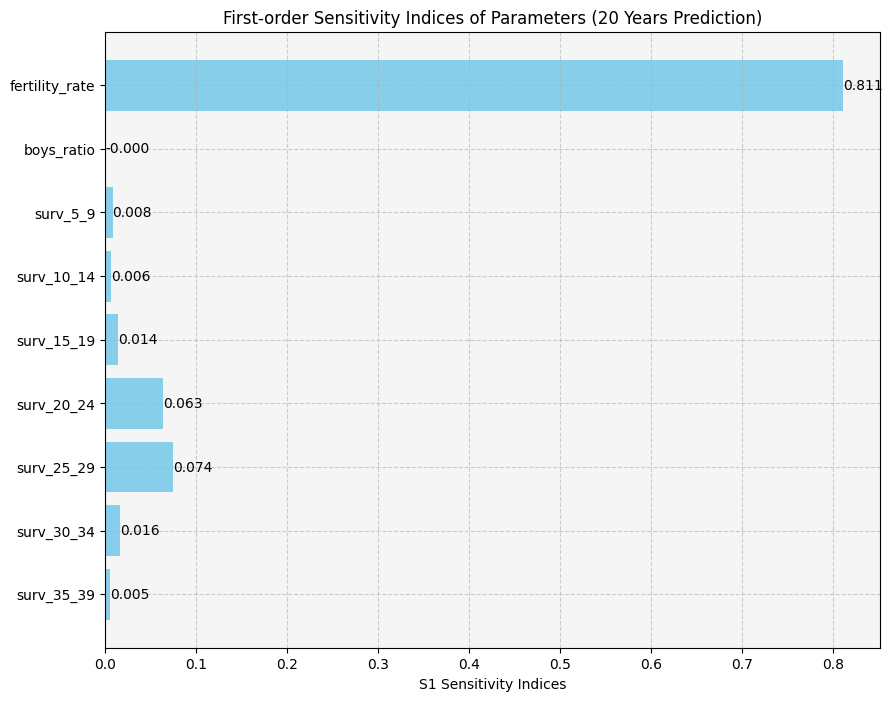

In [288]:
s1_values = Si['S1']

plot_sensitivity_indices(parameters, s1_values, 20)

50 Years Sensitivity Analysis

In [289]:
problem = {
    'num_vars': 9,
    'names': ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    'bounds': [
        [min_fertility_rate, max_fertility_rate], 
        [min_boys, max_boys],
        [min_survival_rate['5 - 9'], max_survival_rate['5 - 9']],
        [min_survival_rate['10 - 14'], max_survival_rate['10 - 14']],
        [min_survival_rate['15 - 19'], max_survival_rate['15 - 19']],
        [min_survival_rate['20 - 24'], max_survival_rate['20 - 24']],
        [min_survival_rate['25 - 29'], max_survival_rate['25 - 29']],
        [min_survival_rate['30 - 34'], max_survival_rate['30 - 34']],
        [min_survival_rate['35 - 39'], max_survival_rate['35 - 39']]
    ]
}

def Evaluate(param_values):
    Y = []

    for params in param_values:
        fertility_rate = params[0]
        boys_ratio = params[1]
        survival_rate_partial = params[2:9]  # Corrected the range to include all survival rate variables
        survival_rate = np.ones(21)
        survival_rate[1:8] = survival_rate_partial  # Corrected the range to include '35 - 39' group

        res = predictionModel(
            fertility = fertility_rate,
            boy_probability = boys_ratio,
            survival_rate = survival_rate,
            forecast_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055]
        )
        
        total_population_last_year = res.iloc[-1].sum()
        Y.append(total_population_last_year)
    
    return np.array(Y)

param_values = saltelli.sample(problem, 500)
Y = Evaluate(param_values)
Si = sobol.analyze(problem, Y, print_to_console=False)
print("__________________")
print(Si['S1'])

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_83866/492789045.py:39: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
[ 9.00537194e-01 -1.68713753e-05  8.17384081e-03  5.73398419e-03
  1.16080496e-02  3.22400238e-02  2.98210930e-02  4.78591928e-03
  1.26825480e-03]


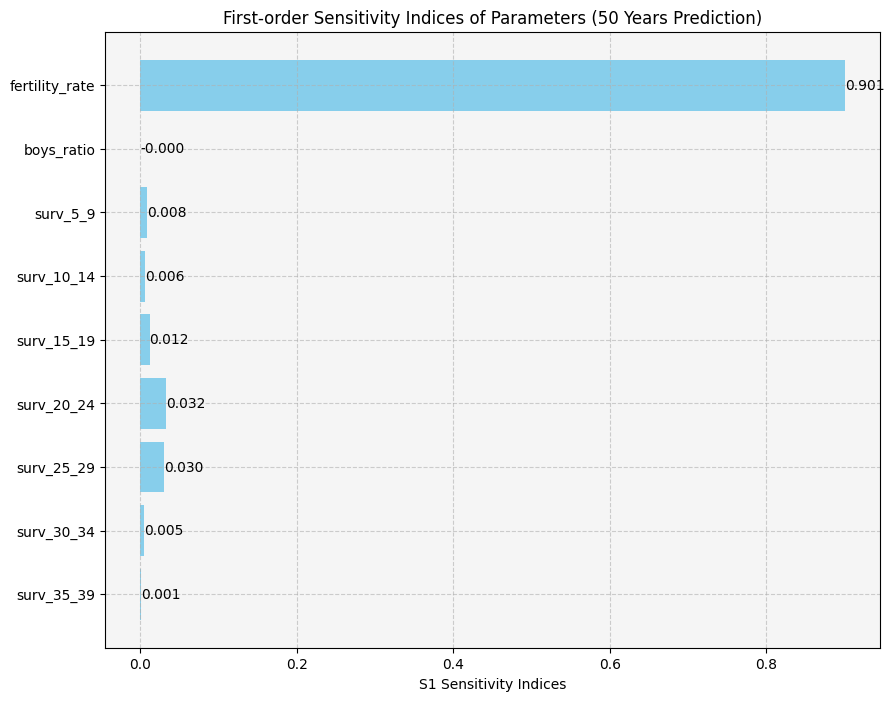

In [290]:
s1_values = Si['S1']

plot_sensitivity_indices(parameters, s1_values, 50)

100 Years Sensitivity Analysis

In [291]:
problem = {
    'num_vars': 9,
    'names': ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    'bounds': [
        [min_fertility_rate, max_fertility_rate], 
        [min_boys, max_boys],
        [min_survival_rate['5 - 9'], max_survival_rate['5 - 9']],
        [min_survival_rate['10 - 14'], max_survival_rate['10 - 14']],
        [min_survival_rate['15 - 19'], max_survival_rate['15 - 19']],
        [min_survival_rate['20 - 24'], max_survival_rate['20 - 24']],
        [min_survival_rate['25 - 29'], max_survival_rate['25 - 29']],
        [min_survival_rate['30 - 34'], max_survival_rate['30 - 34']],
        [min_survival_rate['35 - 39'], max_survival_rate['35 - 39']]
    ]
}

def Evaluate(param_values):
    Y = []

    for params in param_values:
        fertility_rate = params[0]
        boys_ratio = params[1]
        survival_rate_partial = params[2:9]  # Corrected the range to include all survival rate variables
        survival_rate = np.ones(21)
        survival_rate[1:8] = survival_rate_partial  # Corrected the range to include '35 - 39' group

        res = predictionModel(
            fertility = fertility_rate,
            boy_probability = boys_ratio,
            survival_rate = survival_rate,
            forecast_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, 2105]
        )
        
        total_population_last_year = res.iloc[-1].sum()
        Y.append(total_population_last_year)
    
    return np.array(Y)

param_values = saltelli.sample(problem, 500)
Y = Evaluate(param_values)
Si = sobol.analyze(problem, Y, print_to_console=False)
print("__________________")
print(Si['S1'])

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_83866/473820500.py:39: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
[ 9.07409693e-01 -2.07559421e-04  7.99138754e-03  6.24869702e-03
  1.21125917e-02  2.35484791e-02  2.07393294e-02  2.50153507e-03
  5.80672319e-04]


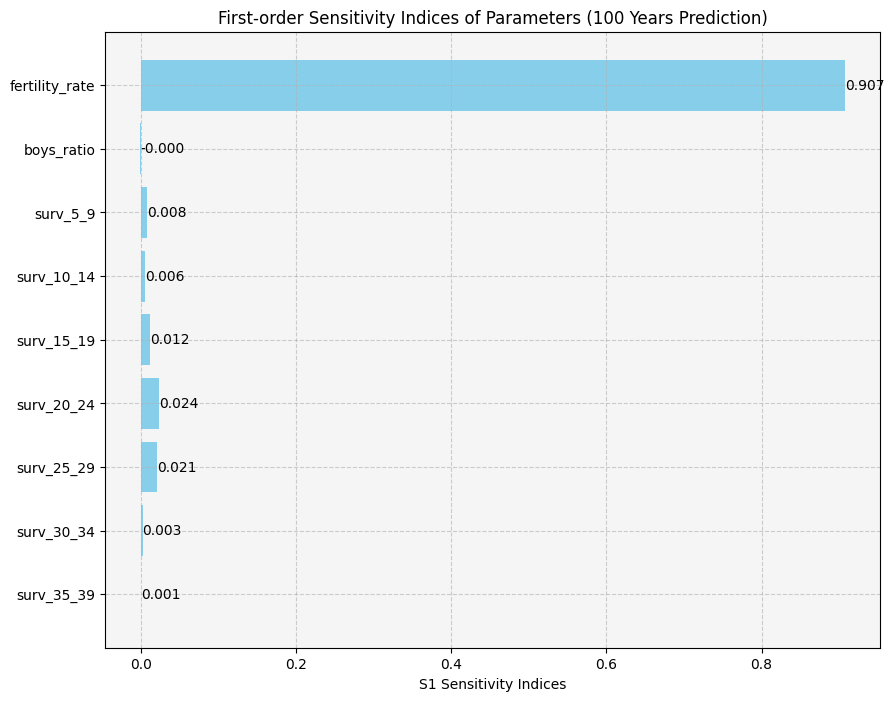

In [292]:
s1_values = Si['S1']

plot_sensitivity_indices(parameters, s1_values, 100)

Based on all ranges of parameter values, perform an uncertainty analysis in the form of a graph with prediction intervals of the results (calculated based on various scenarios, see slide 7). The values ​​between the boundaries can be considered evenly distributed

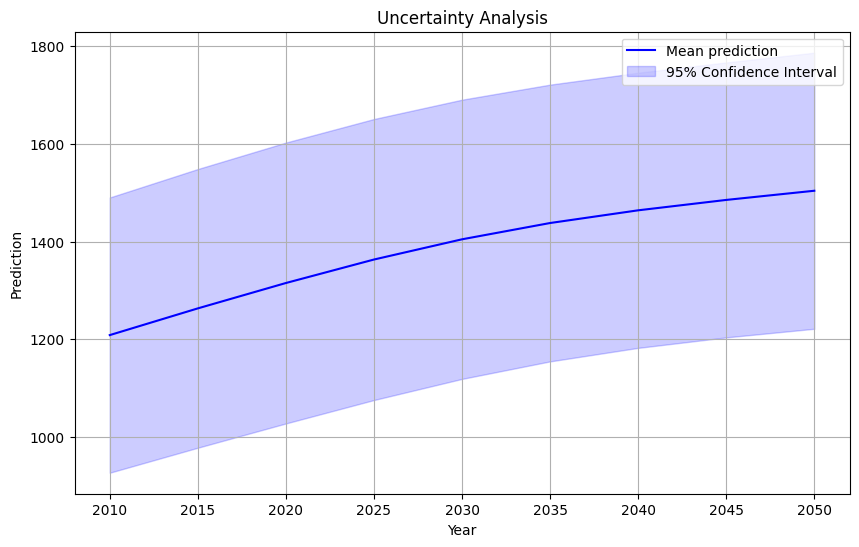

In [353]:
# Based on all ranges of parameter values, perform an uncertainty analysis in 
# the form of a graph with prediction intervals of the results 
# (calculated based on various scenarios, see slide 7). The values ​​between the boundaries can be considered evenly distributed.

forecast_years = [2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

predictions = predictionModel(
    fertility = fertility_rate,
    boy_probability = boys_ratio,
    survival_rate = survival_rate,
    forecast_years = forecast_years
)

predictions_array = predictions.values  # assuming 'predictions' is your DataFrame

# Initialize arrays for mean, lower and upper bounds
mean_prediction = np.zeros(predictions_array.shape[0])
lower_bound = np.zeros(predictions_array.shape[0])
upper_bound = np.zeros(predictions_array.shape[0])

# Calculate mean, lower and upper bounds for each year
for i in range(predictions_array.shape[0]):
    mean_prediction[i] = np.mean(predictions_array[i, :])
    std_error = np.std(predictions_array[i, :]) / np.sqrt(predictions_array.shape[1])
    lower_bound[i] = mean_prediction[i] - 1.96 * std_error  # lower bound of 95% CI
    upper_bound[i] = mean_prediction[i] + 1.96 * std_error  # upper bound of 95% CI

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(forecast_years, mean_prediction, color='b', label='Mean prediction')
plt.fill_between(forecast_years, lower_bound, upper_bound, color='b', alpha=0.2, label='95% Confidence Interval')

plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()



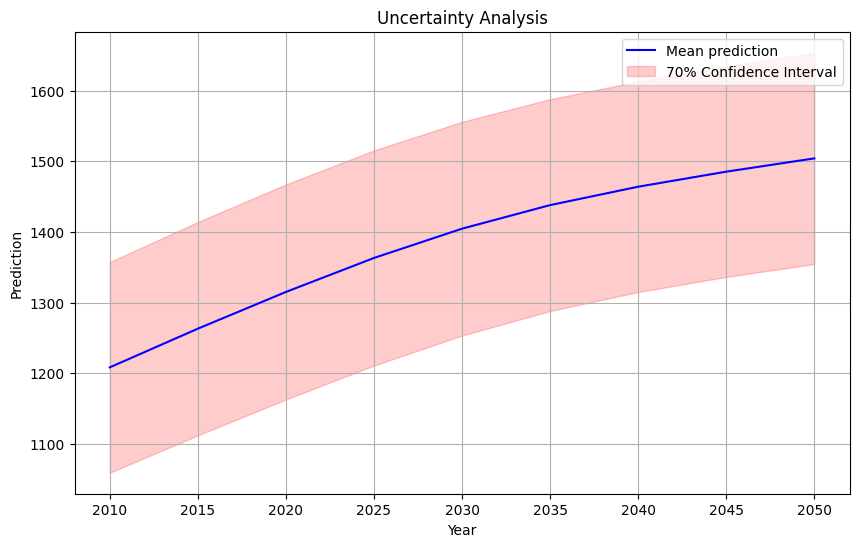

In [358]:
from scipy.stats import norm

# Initialize arrays for mean and confidence interval
mean_prediction = np.zeros(predictions_array.shape[0])
lower_bound = np.zeros(predictions_array.shape[0])
upper_bound = np.zeros(predictions_array.shape[0])

# Calculate mean and confidence interval for each year
for i in range(predictions_array.shape[0]):
    mean_prediction[i] = np.mean(predictions_array[i, :])
    std_error = np.std(predictions_array[i, :]) / np.sqrt(predictions_array.shape[1])
    
    z_score = norm.ppf((100 + 70) / 200)  # Convert confidence level to z-score
    lower_bound[i] = mean_prediction[i] - z_score * std_error
    upper_bound[i] = mean_prediction[i] + z_score * std_error

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(forecast_years, mean_prediction, color='b', label='Mean prediction')
plt.fill_between(forecast_years, lower_bound, upper_bound, color='r', alpha=0.2, label='70% Confidence Interval')
plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


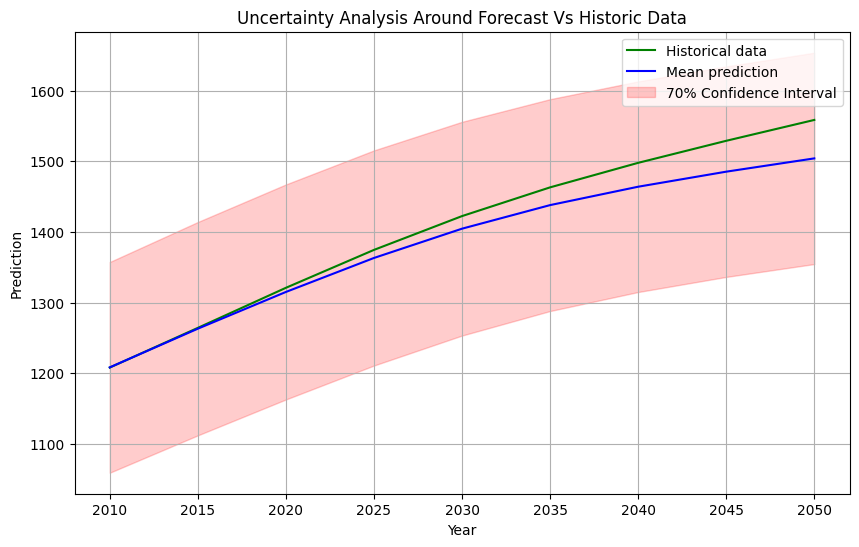

In [360]:
# Assume historical_data is your DataFrame with historical populations
historical_years = both_2010_2050_medium_fertility.index.values
historical_population = both_2010_2050_medium_fertility.mean(axis=1) # Sum across age groups for total population

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(historical_years, historical_population, color='g', label='Historical data')
plt.plot(forecast_years, mean_prediction, color='b', label='Mean prediction')
plt.fill_between(forecast_years, lower_bound, upper_bound, color='r', alpha=0.2, label='70% Confidence Interval')
plt.title('Uncertainty Analysis Around Forecast Vs Historic Data')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


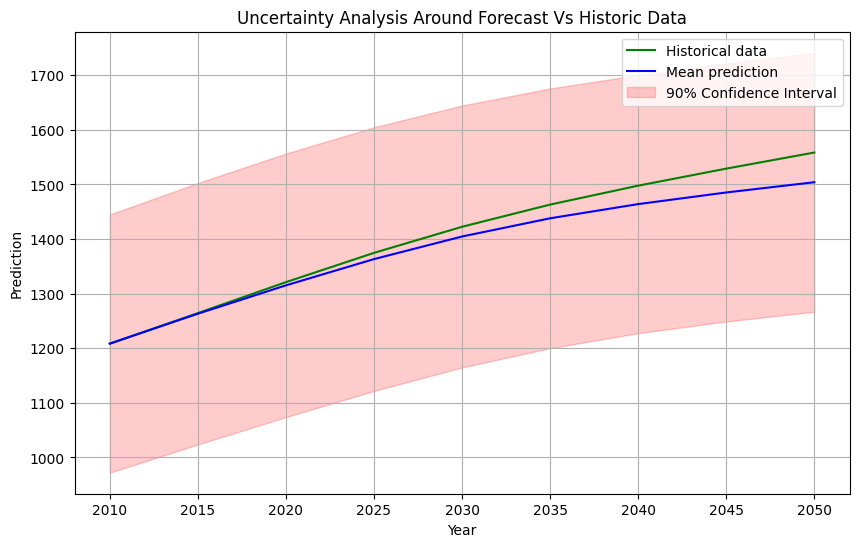

In [361]:
from scipy.stats import norm

# Initialize arrays for mean and confidence interval
mean_prediction = np.zeros(predictions_array.shape[0])
lower_bound = np.zeros(predictions_array.shape[0])
upper_bound = np.zeros(predictions_array.shape[0])

# Calculate mean and confidence interval for each year
for i in range(predictions_array.shape[0]):
    mean_prediction[i] = np.mean(predictions_array[i, :])
    std_error = np.std(predictions_array[i, :]) / np.sqrt(predictions_array.shape[1])
    
    z_score = norm.ppf((100 + 90) / 200)  # Convert confidence level to z-score
    lower_bound[i] = mean_prediction[i] - z_score * std_error
    upper_bound[i] = mean_prediction[i] + z_score * std_error

# Assume historical_data is your DataFrame with historical populations
historical_years = both_2010_2050_medium_fertility.index.values
historical_population = both_2010_2050_medium_fertility.mean(axis=1) # Sum across age groups for total population

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(historical_years, historical_population, color='g', label='Historical data')
plt.plot(forecast_years, mean_prediction, color='b', label='Mean prediction')
plt.fill_between(forecast_years, lower_bound, upper_bound, color='r', alpha=0.2, label='90% Confidence Interval')
plt.title('Uncertainty Analysis Around Forecast Vs Historic Data')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


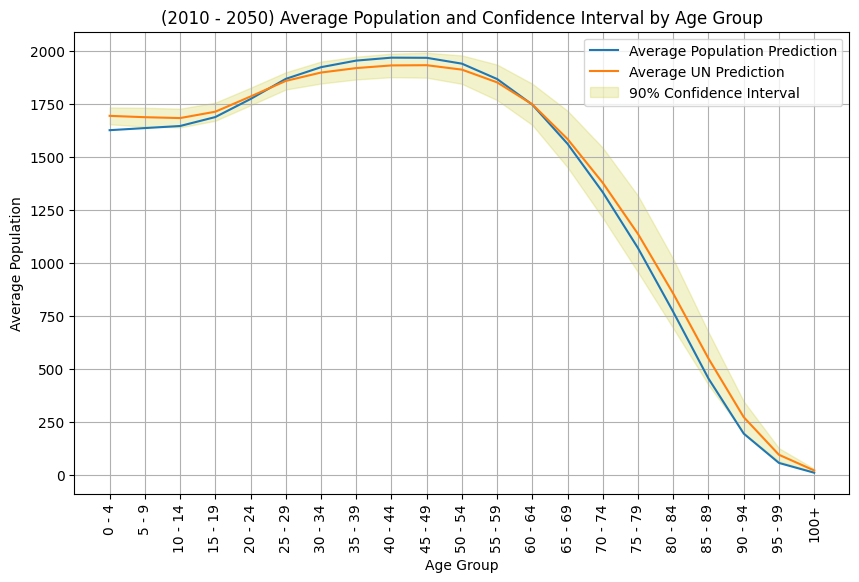

In [412]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average population over the years for each age group
average_population = predictions.mean()
average_historic = both_2010_2050_medium_fertility.mean()

# Calculate the 90% confidence interval
confidence_level = 90
z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score

lower_bounds = []
upper_bounds = []

for age_group in both_2010_2050_medium_fertility.columns:
    std_error = both_2010_2050_medium_fertility[age_group].std() / np.sqrt(len(both_2010_2050_medium_fertility))
    lower_bound = average_historic[age_group] - z_score * std_error
    upper_bound = average_historic[age_group] + z_score * std_error
    
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions.columns, average_population, label='Average Population Prediction')
plt.plot(both_2010_2050_medium_fertility.columns, average_historic, label='Average UN Prediction')
plt.fill_between(predictions.columns, lower_bounds, upper_bounds, alpha=0.2, color='y', label='90% Confidence Interval')

plt.title('(2010 - 2050) Average Population and Confidence Interval by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.show()


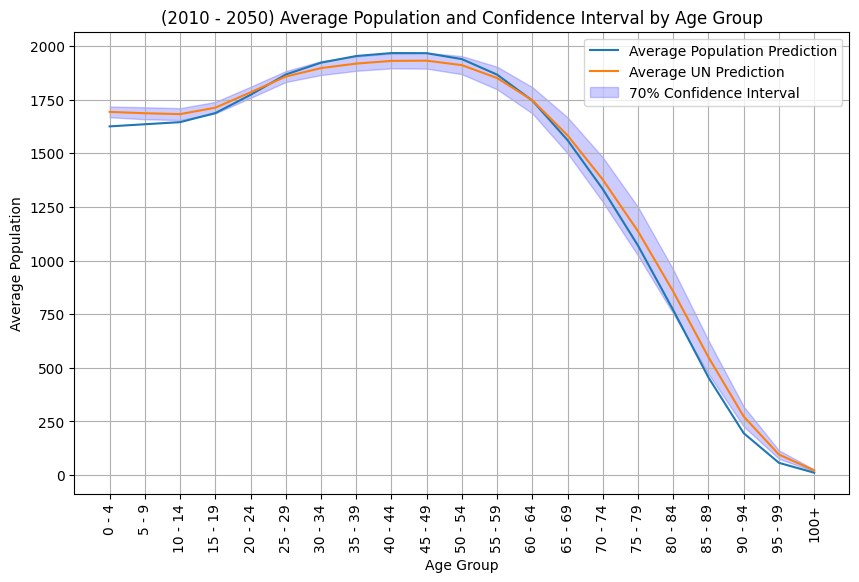

In [413]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average population over the years for each age group
average_population = predictions.mean()
average_historic = both_2010_2050_medium_fertility.mean()

# Calculate the 70% confidence interval
confidence_level = 70
z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score

lower_bounds = []
upper_bounds = []

for age_group in both_2010_2050_medium_fertility.columns:
    std_error = both_2010_2050_medium_fertility[age_group].std() / np.sqrt(len(both_2010_2050_medium_fertility))
    lower_bound = average_historic[age_group] - z_score * std_error
    upper_bound = average_historic[age_group] + z_score * std_error
    
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions.columns, average_population, label='Average Population Prediction')
plt.plot(both_2010_2050_medium_fertility.columns, average_historic, label='Average UN Prediction')
plt.fill_between(predictions.columns, lower_bounds, upper_bounds, alpha=0.2, color='b', label='70% Confidence Interval')

plt.title('(2010 - 2050) Average Population and Confidence Interval by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.show()


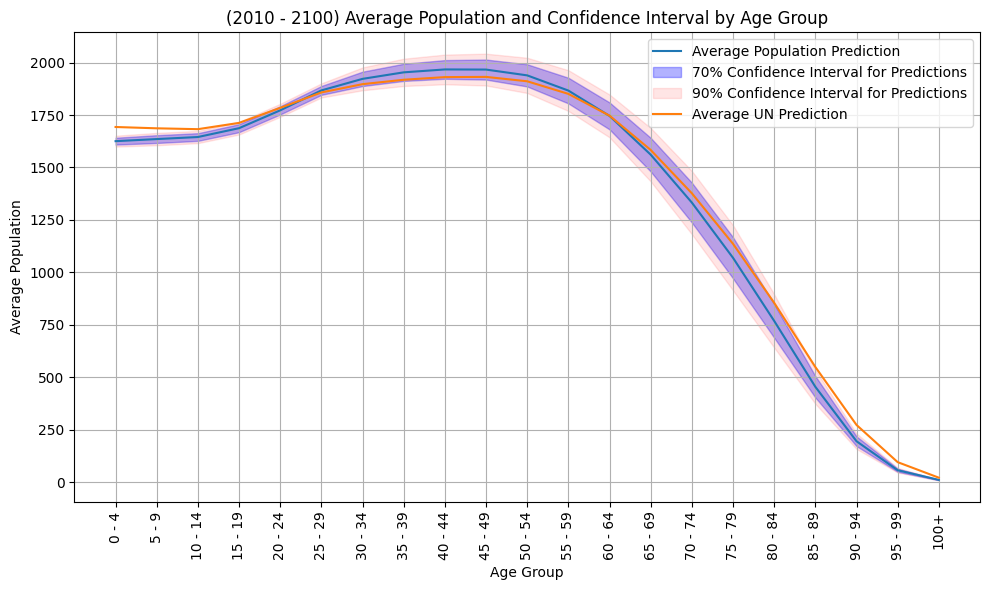

In [420]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# Calculate the average population over the years for each age group
average_population = predictions.mean()
average_historic = both_2010_2050_medium_fertility.mean()

# Calculate the 70% and 90% confidence intervals for predictions
confidence_level_70 = 70
z_score_70 = norm.ppf((100 + confidence_level_70) / 200)  # Convert confidence level to z-score

confidence_level_90 = 90
z_score_90 = norm.ppf((100 + confidence_level_90) / 200)  # Convert confidence level to z-score

lower_bounds_70 = []
upper_bounds_70 = []
lower_bounds_90 = []
upper_bounds_90 = []

for age_group in predictions.columns:
    std_error = predictions[age_group].std() / np.sqrt(len(predictions))
    
    lower_bound_70 = average_population[age_group] - z_score_70 * std_error
    upper_bound_70 = average_population[age_group] + z_score_70 * std_error
    
    lower_bound_90 = average_population[age_group] - z_score_90 * std_error
    upper_bound_90 = average_population[age_group] + z_score_90 * std_error
    
    lower_bounds_70.append(lower_bound_70)
    upper_bounds_70.append(upper_bound_70)
    
    lower_bounds_90.append(lower_bound_90)
    upper_bounds_90.append(upper_bound_90)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions.columns, average_population, label='Average Population Prediction')
plt.fill_between(predictions.columns, lower_bounds_70, upper_bounds_70, alpha=0.3, color='b', label='70% Confidence Interval for Predictions')
plt.fill_between(predictions.columns, lower_bounds_90, upper_bounds_90, alpha=0.1, color='r', label='90% Confidence Interval for Predictions')
plt.plot(both_2010_2050_medium_fertility.columns, average_historic, label='Average UN Prediction')

plt.title('(2010 - 2100) Average Population and Confidence Interval by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the layout to prevent clipping of labels
plt.show()


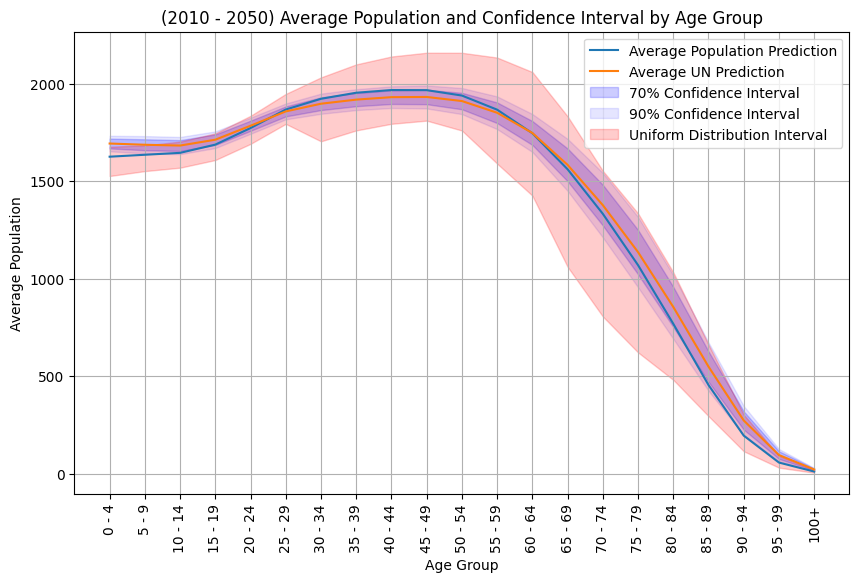

In [421]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate the average population over the years for each age group
average_population = predictions.mean()
average_historic = both_2010_2050_medium_fertility.mean()

# Calculate the 70% confidence interval
confidence_level = 70
z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score

lower_bounds_70 = []
upper_bounds_70 = []
lower_bounds_90 = []
upper_bounds_90 = []
uniform_lower_bounds = []
uniform_upper_bounds = []

for age_group in both_2010_2050_medium_fertility.columns:
    std_error = both_2010_2050_medium_fertility[age_group].std() / np.sqrt(len(both_2010_2050_medium_fertility))
    
    # For Normal Distribution
    lower_bound_70 = average_historic[age_group] - z_score * std_error
    upper_bound_70 = average_historic[age_group] + z_score * std_error
    
    # For 90% confidence interval
    z_score_90 = norm.ppf((100 + 90) / 200)
    lower_bound_90 = average_historic[age_group] - z_score_90 * std_error
    upper_bound_90 = average_historic[age_group] + z_score_90 * std_error
    
    # For Uniform Distribution
    uniform_lower_bound = predictions[age_group].min()
    uniform_upper_bound = predictions[age_group].max()
    
    lower_bounds_70.append(lower_bound_70)
    upper_bounds_70.append(upper_bound_70)
    lower_bounds_90.append(lower_bound_90)
    upper_bounds_90.append(upper_bound_90)
    uniform_lower_bounds.append(uniform_lower_bound)
    uniform_upper_bounds.append(uniform_upper_bound)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions.columns, average_population, label='Average Population Prediction')
plt.plot(both_2010_2050_medium_fertility.columns, average_historic, label='Average UN Prediction')

# Normal Distribution Confidence Intervals
plt.fill_between(predictions.columns, lower_bounds_70, upper_bounds_70, alpha=0.2, color='b', label='70% Confidence Interval')
plt.fill_between(predictions.columns, lower_bounds_90, upper_bounds_90, alpha=0.1, color='b', label='90% Confidence Interval')

# Uniform Distribution Confidence Intervals
plt.fill_between(predictions.columns, uniform_lower_bounds, uniform_upper_bounds, alpha=0.2, color='r', label='Uniform Distribution Interval')

plt.title('(2010 - 2050) Average Population and Confidence Interval by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.show()
